## A1. Use numpy.fft.fft() to transform the speech signal to its spectral domain. Please plot the amplitude part of the spectral components and observe it. Use numpy.fft.ifft() to inverse transform the frequency spectrum to time domain signal.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav


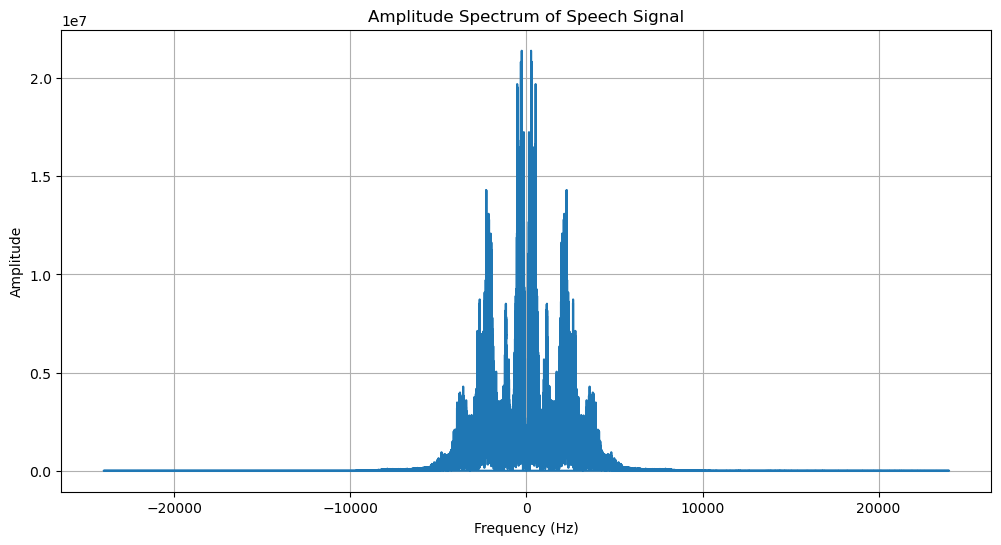

In [2]:
sample_rate, signal = wav.read('chaitu_voice.wav')

# Perform FFT (Fast Fourier Transform) on the speech signal
spectrum = np.fft.fft(signal)

# Calculate the corresponding frequencies
frequencies = np.fft.fftfreq(len(spectrum), d=1/sample_rate)

# Take the absolute value of the spectrum to get the amplitude
amplitude = np.abs(spectrum)

# Plot the amplitude part of the spectral components
plt.figure(figsize=(12, 6))
plt.plot(frequencies, amplitude)
plt.title('Amplitude Spectrum of Speech Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

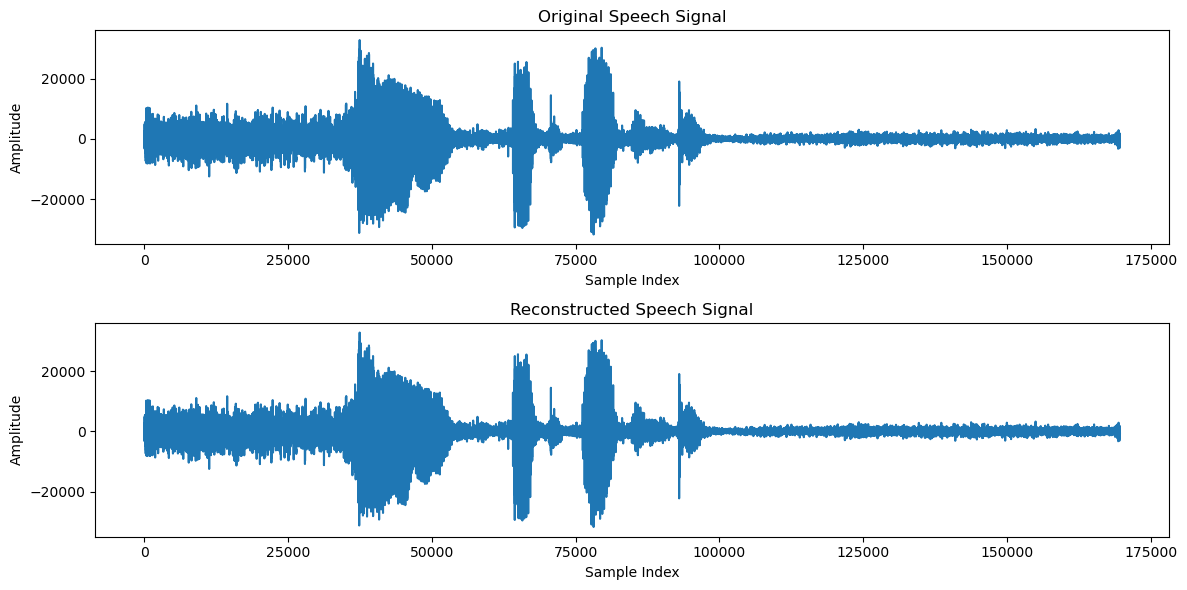

In [3]:
# Perform FFT (Fast Fourier Transform) on the speech signal
spectrum = np.fft.fft(signal)

# Perform IFFT (Inverse Fast Fourier Transform) to get back to the time domain
reconstructed_signal = np.fft.ifft(spectrum)

# Plot the original and reconstructed signals for comparison
plt.figure(figsize=(12, 6))

# Plot the original signal
plt.subplot(2, 1, 1)
plt.plot(signal)
plt.title('Original Speech Signal')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')

# Plot the reconstructed signal
plt.subplot(2, 1, 2)
plt.plot(np.real(reconstructed_signal))  # Use np.real() to get the real part
plt.title('Reconstructed Speech Signal')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


## A2. Use a rectangular window to select the low frequency components from your spectrum. Inverse transform the filtered spectrum and listen to this sound. Repeat the same for band pass and high pass frequencies of spectrum.

In [4]:
pip install numpy matplotlib scipy


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft, ifft
import librosa

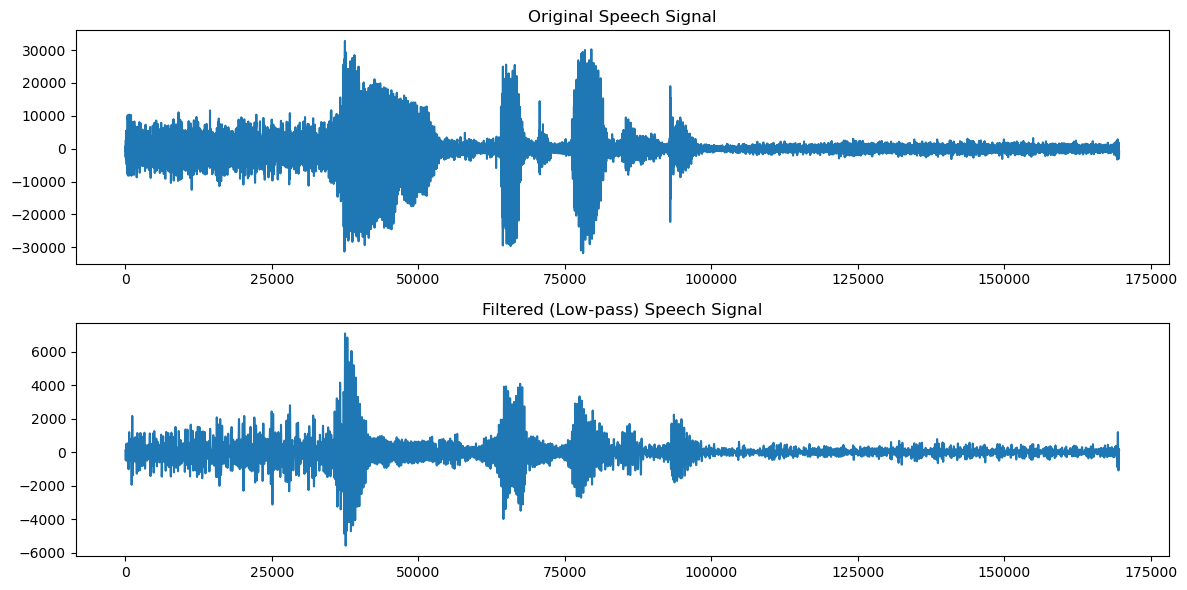

In [6]:
# Load the speech signal from the WAV file
sampling_rate, speech_signal = wavfile.read('chaitu_voice.wav')

# Perform FFT
fft_result = np.fft.fft(speech_signal)

# Calculate the amplitudes of the spectral components
amplitudes = np.abs(fft_result)

# Create the frequency axis
freq_axis = np.fft.fftfreq(len(amplitudes), 1/sampling_rate)

# Rectangular window for low-pass filter
low_pass_cutoff = 1000  # Set the cutoff frequency for low-pass
rectangular_window_low = np.ones_like(amplitudes)
rectangular_window_low[low_pass_cutoff:] = 0
rectangular_window_low[-low_pass_cutoff:] = 0

# Apply the low-pass filter in the frequency domain
filtered_spectrum_low = fft_result * rectangular_window_low

# Inverse transform to get the filtered signal
filtered_signal_low = ifft(filtered_spectrum_low).real

# Plot the original and filtered signals for low-pass
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(speech_signal)
plt.title('Original Speech Signal')

plt.subplot(2, 1, 2)
plt.plot(filtered_signal_low)
plt.title('Filtered (Low-pass) Speech Signal')

plt.tight_layout()
plt.show()

# Save the filtered sound to a new WAV file
wavfile.write('filtered_low_pass.wav', sampling_rate, filtered_signal_low.astype(np.int16))

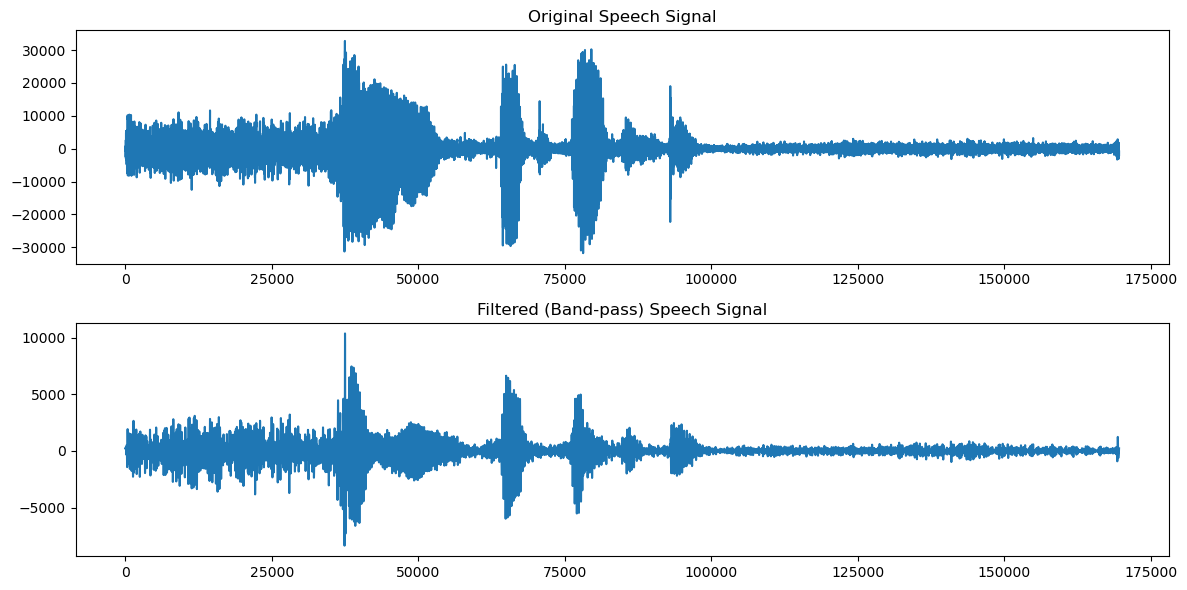

In [7]:
# Rectangular window for band-pass filter
band_pass_low_cutoff = 500  # Set the low cutoff frequency for band-pass
band_pass_high_cutoff = 1500  # Set the high cutoff frequency for band-pass
rectangular_window_band_pass = np.zeros_like(amplitudes)
rectangular_window_band_pass[band_pass_low_cutoff:band_pass_high_cutoff] = 1

# Apply the band-pass filter in the frequency domain
filtered_spectrum_band_pass = fft_result * rectangular_window_band_pass

# Inverse transform to get the filtered signal
filtered_signal_band_pass = ifft(filtered_spectrum_band_pass).real

# Plot the original and filtered signals for band-pass
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(speech_signal)
plt.title('Original Speech Signal')

plt.subplot(2, 1, 2)
plt.plot(filtered_signal_band_pass)
plt.title('Filtered (Band-pass) Speech Signal')

plt.tight_layout()
plt.show()

# Save the filtered sound to a new WAV file
wavfile.write('filtered_band_pass.wav', sampling_rate, filtered_signal_band_pass.astype(np.int16))

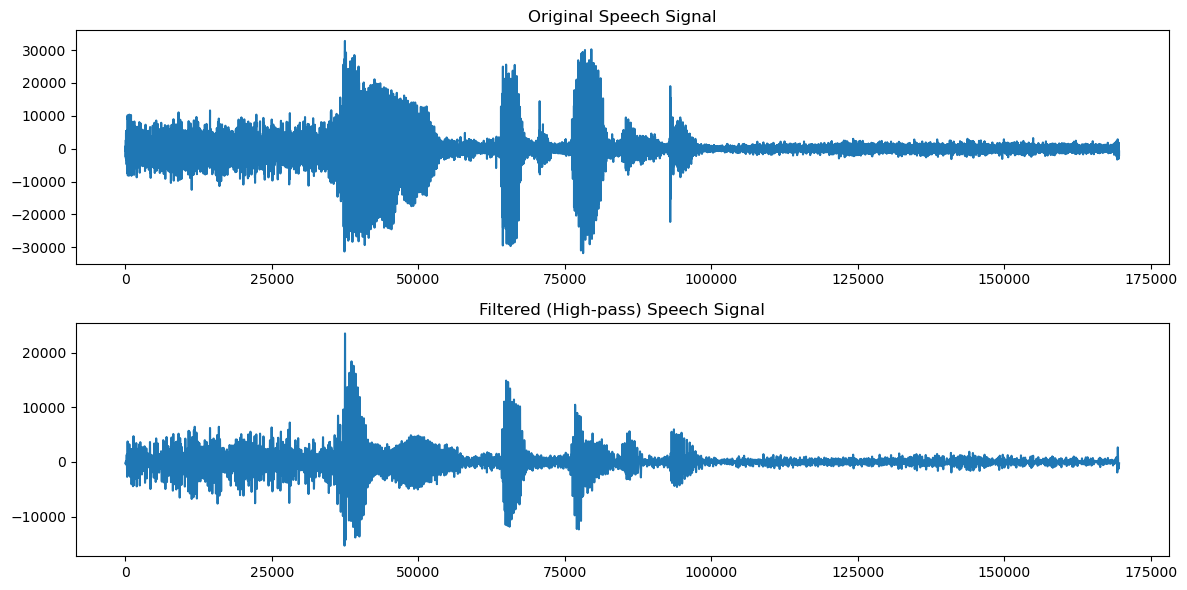

In [8]:
# Rectangular window for high-pass filter
high_pass_cutoff = 1500  # Set the cutoff frequency for high-pass
rectangular_window_high_pass = np.zeros_like(amplitudes)
rectangular_window_high_pass[:high_pass_cutoff] = 1
rectangular_window_high_pass[-high_pass_cutoff:] = 1

# Apply the high-pass filter in the frequency domain
filtered_spectrum_high_pass = fft_result * rectangular_window_high_pass

# Inverse transform to get the filtered signal
filtered_signal_high_pass = ifft(filtered_spectrum_high_pass).real

# Plot the original and filtered signals for high-pass
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(speech_signal)
plt.title('Original Speech Signal')

plt.subplot(2, 1, 2)
plt.plot(filtered_signal_high_pass)
plt.title('Filtered (High-pass) Speech Signal')

plt.tight_layout()
plt.show()

# Save the filtered sound to a new WAV file
wavfile.write('filtered_high_pass.wav', sampling_rate, filtered_signal_high_pass.astype(np.int16))

## A3. Repeat A2 with other filter types such as Cosine / Gausian filters.

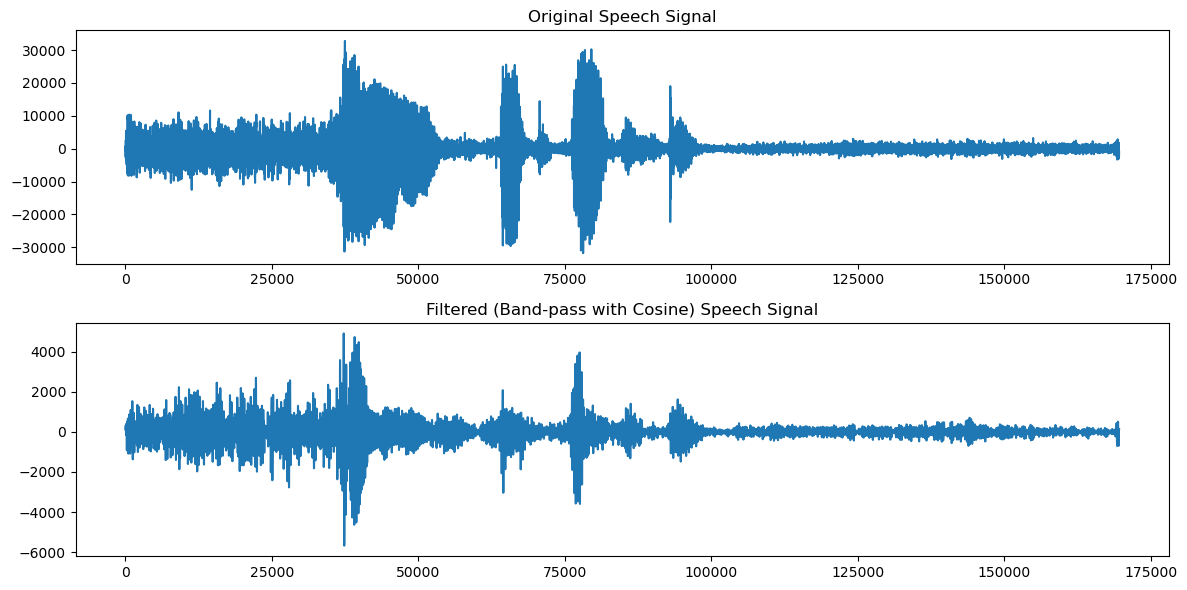

In [9]:
# Cosine window for band-pass filter
band_pass_low_cutoff = 500  # Set the low cutoff frequency for band-pass
band_pass_high_cutoff = 1500  # Set the high cutoff frequency for band-pass
cosine_window_band_pass = np.zeros_like(amplitudes)
cosine_window_band_pass[band_pass_low_cutoff:band_pass_high_cutoff] = np.cos(
    np.linspace(0, np.pi, band_pass_high_cutoff - band_pass_low_cutoff)
)

# Apply the band-pass filter in the frequency domain
filtered_spectrum_band_pass_cosine = fft_result * cosine_window_band_pass

# Inverse transform to get the filtered signal
filtered_signal_band_pass_cosine = ifft(filtered_spectrum_band_pass_cosine).real

# Plot the original and filtered signals for band-pass with cosine window
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(speech_signal)
plt.title('Original Speech Signal')

plt.subplot(2, 1, 2)
plt.plot(filtered_signal_band_pass_cosine)
plt.title('Filtered (Band-pass with Cosine) Speech Signal')

plt.tight_layout()
plt.show()

# Save the filtered sound to a new WAV file
wavfile.write('filtered_band_pass_cosine.wav', sampling_rate, filtered_signal_band_pass_cosine.astype(np.int16))

#### guassian

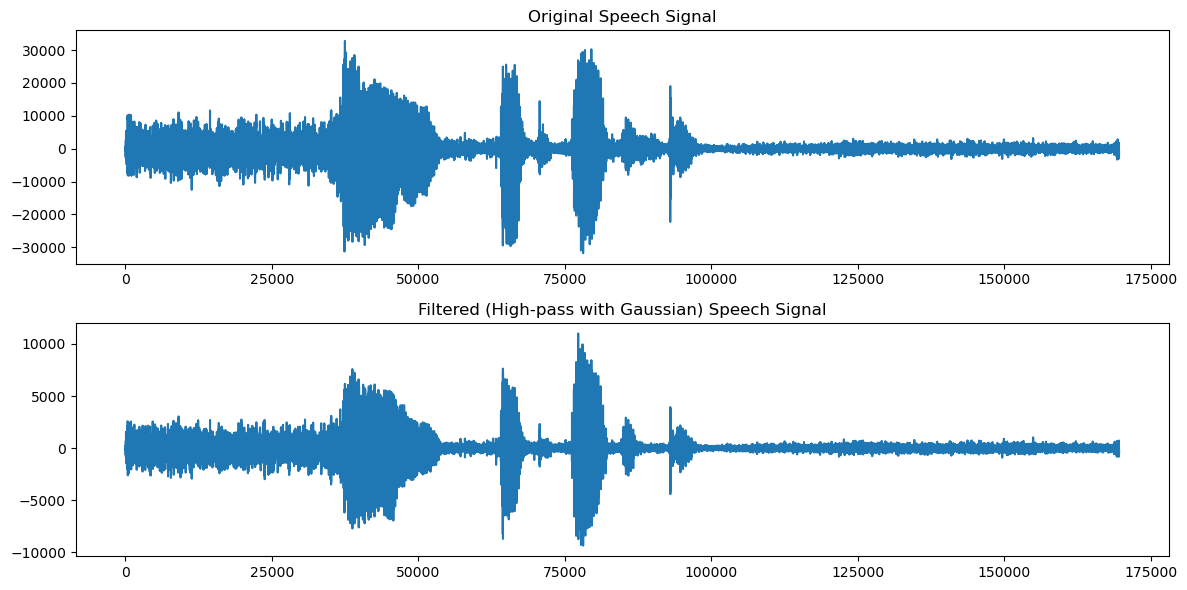

In [10]:
# Gaussian window for high-pass filter
high_pass_cutoff = 1500  # Set the cutoff frequency for high-pass
gaussian_window_high_pass = np.exp(-0.5 * ((freq_axis - high_pass_cutoff) / (high_pass_cutoff / 2))**2)

# Apply the high-pass filter in the frequency domain
filtered_spectrum_high_pass_gaussian = fft_result * gaussian_window_high_pass

# Inverse transform to get the filtered signal
filtered_signal_high_pass_gaussian = ifft(filtered_spectrum_high_pass_gaussian).real

# Plot the original and filtered signals for high-pass with Gaussian window
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(speech_signal)
plt.title('Original Speech Signal')

plt.subplot(2, 1, 2)
plt.plot(filtered_signal_high_pass_gaussian)
plt.title('Filtered (High-pass with Gaussian) Speech Signal')

plt.tight_layout()
plt.show()

# Save the filtered sound to a new WAV file
wavfile.write('filtered_high_pass_gaussian.wav', sampling_rate, filtered_signal_high_pass_gaussian.astype(np.int16))